# Examples of Machine Learning

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
turb.__version__

'0.2.2'

## Generating synthetic data

In [3]:
from scipy import stats

## Using `fit_basic`: Fitting models using Linear Regression (OLS)

Given:

- `df`: A `MetaPanda` object
- `x`: A selector or list of columns in `df`
- `y`: A string selecting the target
- `model`: A string of which sklearn object to use, or alternatively the model itself

We fit this model to the data and return:

1. `cv`: the cross-validated repeat results of test scores, train scores, fit times etc.
2. `yp`: the cross-validated predicted values for each element.
3. `coef`: the coefficients across each cross-validation.

### Random cases

In [4]:
# random 1
df_1 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,3)), columns=['x1', 'x2', 'x3'])
df_1['y'] = stats.norm.rvs(loc=0, scale=2, size=(100,))

# random 2
df_2 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,)), columns=['x1'])
df_2['y'] = stats.norm.rvs(loc=0, scale=2, size=(100,))

In [5]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_1), 'x[1-3]', 'y')
cv['test_score'].mean()

-0.12460435598630899

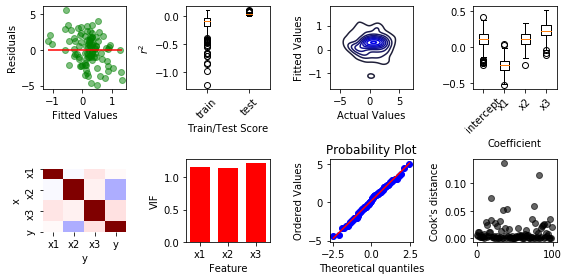

In [6]:
turb.ml.overview_plot(turb.MetaPanda(df_1), 'x[1-3]', 'y', cv, yp)

In [7]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_2), 'x1', 'y')
cv['test_score'].mean()

-0.0994570176796526

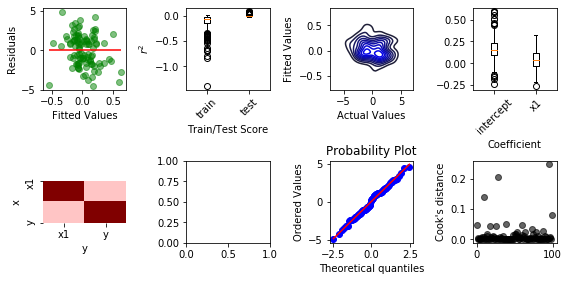

In [8]:
turb.ml.overview_plot(turb.MetaPanda(df_2), 'x1', 'y', cv, yp)

### Linear cases

In [9]:
# linear 1
df_3 = pd.DataFrame(stats.norm.rvs(loc=2, scale=3, size=(100,3)), columns=['x1', 'x2', 'x3'])
df_3['y'] = df_3.sum(axis=1) / 3. + stats.norm.rvs(loc=0, scale=.25, size=(100,), random_state=42)

In [10]:
cv, yp = turb.ml.fit_basic(turb.MetaPanda(df_3), 'x[1-3]', 'y', model="LinearRegression")
cv['test_score'].mean()

0.9792333307210023

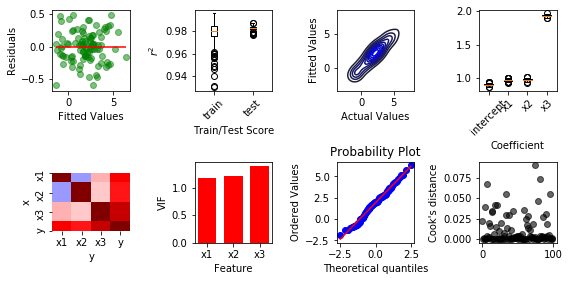

In [11]:
turb.ml.overview_plot(turb.MetaPanda(df_3), 'x[1-3]', 'y', cv, yp)